##  Conditional node or graph

In [1]:
from typing import TypedDict

class PortfolioState(TypedDict):
    
    amount_usd: float   
    total_usd: float   
    target_currency: str 
    total: float
   

In [3]:
def calc_total(state : PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.10  # Assuming a 10% interest rate
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd'] * 86.0  # Assuming 1 USD = 86 INR
    return state

def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd'] * 0.9  
    return state

def choose_conversion(state: PortfolioState) -> str:
    return state['target_currency']

In [4]:
from langgraph.graph import StateGraph, START, END

graph = StateGraph(PortfolioState)

graph.add_node("calc_total_node", calc_total)
graph.add_node("convert_to_inr_node", convert_to_inr)
graph.add_node("convert_to_eur_node", convert_to_eur)


graph.add_edge(START, "calc_total_node")
graph.add_conditional_edges(
    "calc_total_node",
    choose_conversion,
    {                                   ## here we provide the conditional edges based on the target currency
        "inr": "convert_to_inr_node",   ## this is the mapping stage of converting currencies into inr or eur
        "eur": "convert_to_eur_node"
    }
)
graph.add_edge(["convert_to_inr_node", "convert_to_eur_node"], END)

final = graph.compile()

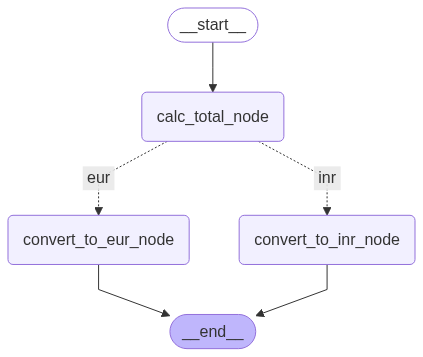

In [6]:
final

In [9]:
final.invoke({
    "amount_usd": 1000.0,
    "target_currency": "eur"})

{'amount_usd': 1000.0,
 'total_usd': 1100.0,
 'target_currency': 'eur',
 'total': 990.0}